In [1]:
!pip install tensorflow

In [2]:
!pip install pandas numpy


In [3]:
import numpy as np
import pandas as pd
import datetime

In [4]:
df = pd.read_csv('WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
import tensorflow as tf

# 75% of the data is selected
train_df = df.sample(frac=0.75, random_state=4)

# it drops the training data
# from the original dataframe
val_df = df.drop(train_df.index)

In [6]:
# calling to (0,1) range
max_val = train_df.max(axis= 0)
min_val = train_df.min(axis= 0)

range = max_val - min_val
train_df = (train_df - min_val)/(range)

val_df = (val_df- min_val)/range

In [10]:
# now let's separate the targets and labels
X_train = train_df.drop('quality',axis=1)
X_val = val_df.drop('quality',axis=1)
y_train = train_df['quality']
y_val = val_df['quality']

# We'll need to pass the shape
# of features/inputs as an argument
# in our model, so let's define a variable
# to save it.
input_shape = X_train.shape[1]
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 1, input_shape = (input_shape, ))
])

model.summary()


e:\Machine Learning\venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
#The input_shape needs to be passed to the first Dense layer as a tuple
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu',
                        input_shape=(input_shape,)), # Pass input_shape as a tuple
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,057 (19.75 KB)

 Trainable params: 5,057 (19.75 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:

# adam optimizer works pretty well for
# all kinds of problems and is a good starting point
model.compile(optimizer='adam',

			# MAE error is good for
			# numerical predictions
			loss='mae')
     
     

In [13]:

losses = model.fit(X_train, y_train,

                   validation_data=(X_val, y_val),

                   # it will use 'batch_size' number
                   # of examples per example
                   batch_size=256,
                   epochs=15,  # total epoch

                   )

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.5063 - val_loss: 0.3366
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2882 - val_loss: 0.1443
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1404 - val_loss: 0.1442
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1620 - val_loss: 0.1631
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1687 - val_loss: 0.1354
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1392 - val_loss: 0.1215
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1264 - val_loss: 0.1285
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1286 - val_loss: 0.1285
Epoch 9/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1275 - val_loss: 0.1173
Epoch 10/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1177 - val_loss: 0.1111
Epoch 11/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1181 - val_loss: 0.1099
Epoch 12/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1165 - val_loss: 0.1067
E

In [14]:
# this will pass the first 3 rows of features
# of our data as input to make predictions
model.predict(X_val.iloc[0:3, :])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


array([[0.43130675],
       [0.43502223],
       [0.35341984]], dtype=float32)

In [15]:
y_val.iloc[0:3]

0    0.4
5    0.4
9    0.4
Name: quality, dtype: float64

In [19]:
!pip install matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------------------ --------------------- 3.7/8.1 MB 19.8 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.1 MB 11.4 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 9.5 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 8.2 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.1 MB 7.7 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 6.8 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   --------------------------- ------------ 1.6/2.3 MB 7.6 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 4.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--


<Axes: >

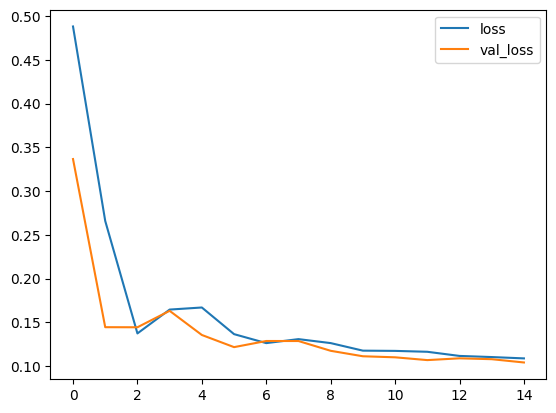

In [20]:
loss_df = pd.DataFrame(losses.history)

# history stores the loss/val
# loss in each epoch

# loss_df is a dataframe which
# contains the losses so we can
# plot it to visualize our model training
loss_df.loc[:, ['loss', 'val_loss']].plot()
